> # 2 지도학습(2)

- 전체 내용 최하단에 정리

### 2.3.4 나이브 베이즈 분류기

In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [3]:
X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
             [0, 0, 0, 1],
             [1, 0, 1, 0]])
y = np.arrafrom IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearny([0, 1, 0, 1])

In [4]:
counts = {}
for label in np.unique(y):
    # 클래스마다 반복
    # 특성마다 1이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운드:\n{}".format(counts))

특성 카운드:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### 장단점과 매개변수

### 2.3.5 결정 트리

#### 결정 트리 만들기

#### 결정 트리의 복잡도 제어하기

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [17]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


#### 결정 트리 분석

In [47]:
# 트리 모형 시각화
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names,
               impurity=False, filled=True)

#import graphviz
#with open("tree.dot") as f:
#    dot_graph = f.read()
#display(graphviz.Source(dot_graph))

#### 트리의 특성 중요도

In [31]:
# 트리의 특성 중요도
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


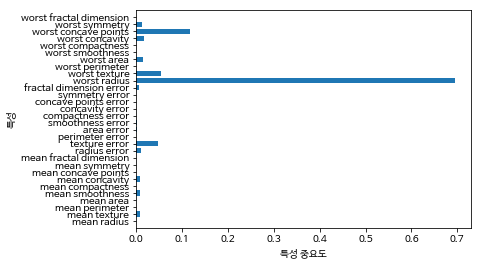

In [42]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importance_cancer(tree)

In [50]:
#tree = mglearn.plots.plot_tree_not_monotone()
#display(tree)

Text(0, 0.5, '가격 ($/Mbyte_)')

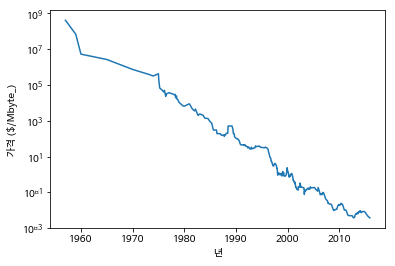

In [54]:
import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte_)")

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터, 2000년 이후를 테스트 데이터로
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 날짜 특성만 이용
X_train = data_train.date[:, np.newaxis]
# 로그 스케일로 변경
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간으로
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 로그 스케일을 원래대로
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

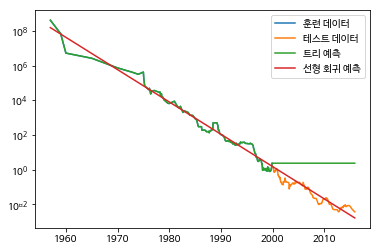

In [63]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형 회귀 예측")
plt.legend()

#### 장단점과 매개변수

### 2.3.6 결정 트리의 앙상블

#### 랜덤 포레스트

#### 랜덤 포레스트 구축

#### 랜덤 포레스트 분석

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

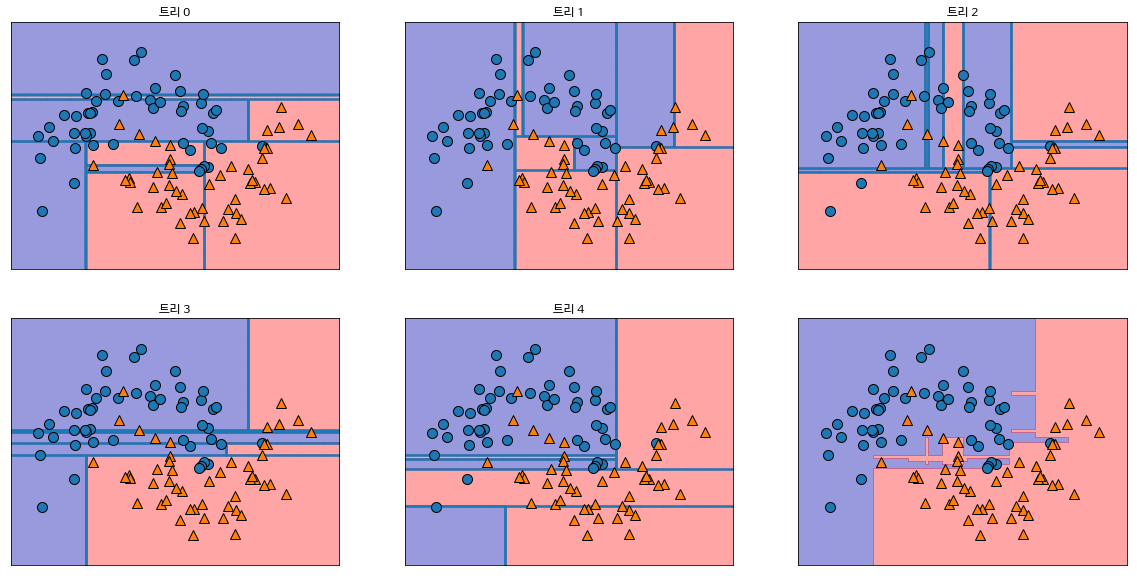

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


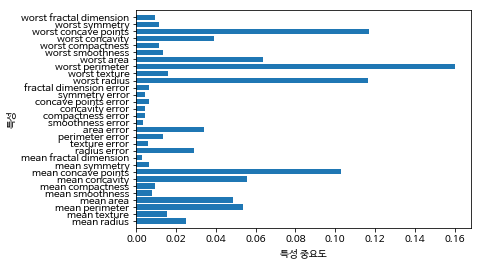

In [70]:
# 특성 중요도
plot_feature_importance_cancer(forest)

#### 장단점과 매개변수

#### 그래디언트 부스팅 회귀 트리

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [74]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [90]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.2)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.995
테스트 세트 정확도: 0.986


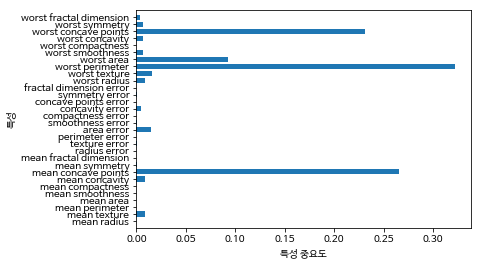

In [93]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importance_cancer(gbrt)

#### 장단점과 매개변수

### 2.3.7 커널 서포트 벡터 머신

#### 선형 모델과 비선형 특성

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 2')

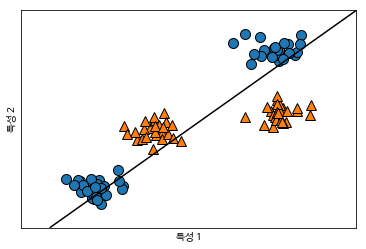

In [99]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[: ,0], X[: ,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1 ** 2')

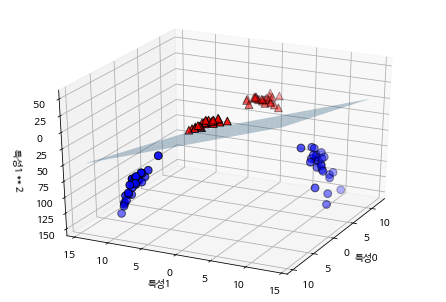

In [108]:
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

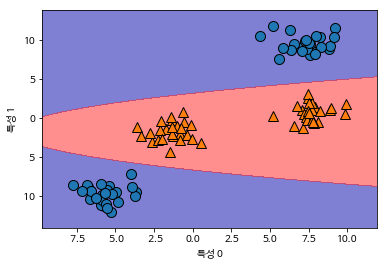

In [110]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### 커널 기법

#### SVM 이해하기

Text(0, 0.5, '특성 1')

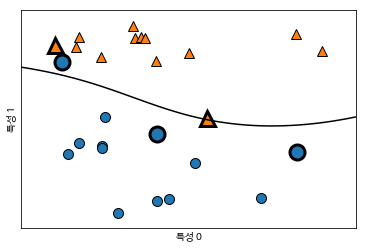

In [115]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
#### 커널 기법
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### SVM 매개변수 튜닝

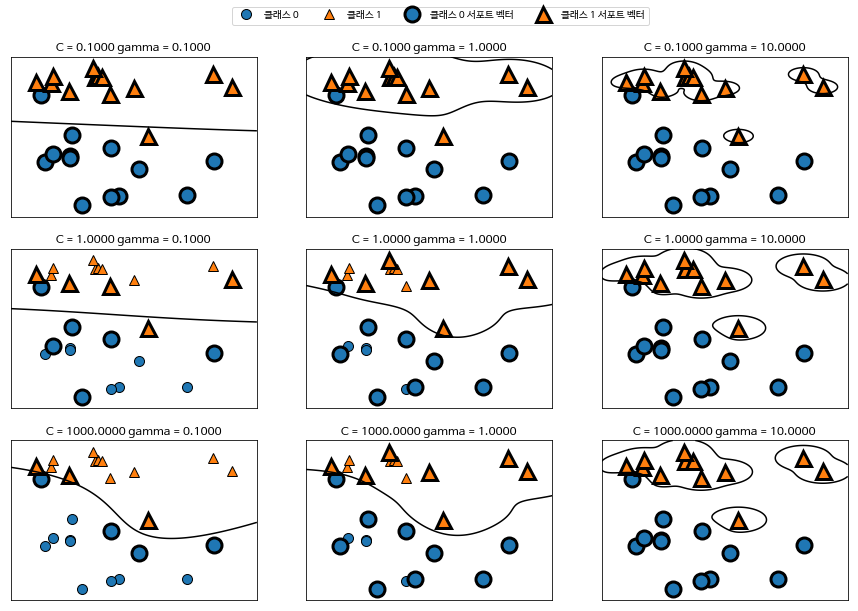

In [120]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터",
                  "클래스 1 서포트 벡터"], ncol=4, loc=(.9, 1.2))

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, '특성 크기')

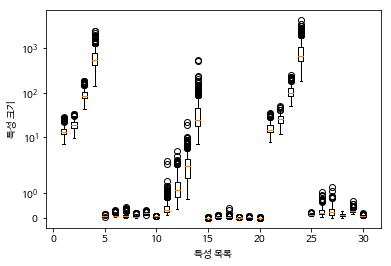

In [123]:
# 각 특성의 최솟값과 최댓값을 로그 스케일로
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

#### SVM을 위한 데이터 전처리

In [127]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 초솟값은 0 최댓값은 1
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최소 값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대 값\n{}".format(X_train_scaled.max(axis=0)))

# 테스트 세트에서는 훈련 세트에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train) # 과소적합

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

svc1000 = SVC(C=1000)
svc1000.fit(X_train_scaled, y_train) # C 값을 증가

print("훈련 세트 정확도: {:.3f}".format(svc1000.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc1000.score(X_test_scaled, y_test)))


특성별 최소 값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대 값
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### 장단점과 매개변수

## 2.3 지도 학습 알고리즘

### 3) 나이브 베이즈 분류기

① 특징
- GaussianNB: 연속적인 데이터, 클래스별로 각 특성의 표준편차와 평균을 저장
- BernoulliNB: 이진 데이터, 
- MultinomialNB: 카운트 데이터, 클래스별로 특성의 평균 계산
- B와 M의 예측 공식은 선형 모델과 형태가 같음, 그러나  coef_의 의미는 다름

② 장단점
- B, M은 모델의 복잡도 조절에 alpha 매개변수를 사용 (데이터 개수를 추가해 데이터를 완만하게)
- 그러나 alpha 값이 성능을 크게 좌우하진 않음
- G는 매우 고차원 데이터셋에서 잘 작동
- 선형 분류기보다 훈련속도 빠름
- 일반화 성능은 조금 뒤지는 편

### 4) 결정 트리

① 특징
- 분류와 회귀 문제에 널리 사용
- 결정에 다다르기 위해 예/아니오 질문을 이어 나감
- 계층적으로 영역을 분할해가는 알고리즘이라고 할 수 있음
- 분할 영역이 한개의 타깃값(클래스나 회귀 분석 결과)을 가질 때까지 반복
- 타깃 하나로만 이루어진 리프 노드를 순수 노드(pure node)라고 함

② 장단점
- 비전문가에게 머신러닝 알고리즘을 설명하기 쉬움
- 모든 노드가 순수 노드가 될 때까지 진행하면 모델이 복잡, 과대적합
- 결정 경계가 이상치에 민감
- 데이터의 스케일에 영향을 받지 않음
- [사전 가지치기, 사후 가지치기, 가지치기] 하나만 사용해도 과대적합을 막는데 충분

③ 트리의 특성 중요도
- 0과 1 사이의 숫자, 특성의 사용도, 전체 합은 1
- 특성 중요도 값이 낮다고 해서, 유용하지 않다는 뜻은 아님

④ 회귀 결정 트리
- 훈련 데이터의 범위 밖의 포인트(외삽)에 대해 예측을 할 수 없음

### 5) 랜덤 포레스트

① 특징
- 모델을 구성하는 기본 요소로 결정 트리를 사용
- 조금씩 다른 결정 트리의 묶음
- 일반 트리의 경우 데이터의 일부에 과대적합하는 경향
- 트리를 많이 만들어 평균을 냄으로써 과대적합을 줄임
- 예측 성능은 유지되면서 과대적합이 줄어듬
- 트리 생성 시 무작위성 주입 [데이터를 무작위 선택, 특성을 무작위로 선택]

② 랜덤 포레스트의 구축
- 트리의 개수 설정
- 부트스트랩 샘플 생성 (복원 추출 지정 횟수만큼)
- 특성 갯수 선택, 특성 무작위, 결정 트리 생성 (특성 갯수 = 전체 특성 갯수이면 무작위성 X)
- 예측의 경우 평균, 분류의 경우 약한 투표 전략
- n_jobs 매개변수로 cpu 코어 갯수 지정 가능, -1이면 모든 코어 사용

③ 장단점
- 특성 중요도가 하나의 트리에서 제공하는 것보다 더 신뢰할 만함
- 성능이 뛰어나고 튜닝을 많이 안해도 잘 작동, 데이터의 스케일 상관 無
- 매우 차원이 높고 희소한 데이터에 잘 작동 X

### 6) 그래디언트 부스팅

① 특징
- 모델을 구성하는 기본 요소로 결정 트리를 사용
- 이전 트리의 오차를 보완하는 방식 (순차적)
- 강력한 사전 가지치기
- 약한 학습기를 많이 연결
- 많은 경우, 안정적으로 랜덤 포레스트를 먼저 적용

② 그래디언트 부스팅의 구축
- n_estimators로 앙상블에 트리가 더 많이 추가 되도록(복잡해짐)
- learning rate를 통해 이전 트리의 오차를 얼마나 보정할 것인지 제어(보통 트리 갯수 설정 이후 조정)
- max_depth는 트리의 깊이(보통 5보다 낮게)

③ 장단점
- 현재 지도학습에서 가장 강력, 널리 사용
- 고차원 데이터에서는 잘 작동하지 않음
- 훈련 시간이 김
- 매개변수 설정에 민감한 편
- 일부 특성을 완전히 무시할 수도 있음
- 시간이 중요하거나 모델의 성능을 더 높이기 위해 사용
- xgboost 패키지도 있음

### 7) 서포트 벡터 머신

① 특징
- 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장
- 회귀 문제에도 같은 개념 적용 가능
- 매개변수 설정과 데이터 스케일에 매우 민감
- 커널 기법
    - 특성을 많이 추가하면 연산 비용이 커지기 때문에 수학적 기교를 사용하는 방법
    - 실제로 데이터를 확장하지 않고, 확장된 특성에 대한 데이터들의 거리(스칼라곱)를 계산
- SVM에서 데이터를 고차원 공간에 매핑하는데 사용되는 방법
    - 1. 다항식 커널: 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산
    - 2. 가우시안 커널: RBF(radial basis function), 모든 차수의 모든 다항식을 고려
    - 특성의 중요도는 고차항이 될수록 줄어듬

② SVM의 이해
- 두 클래스 사이 경계에 위치한 데이터: 서포트 벡터
- 데이터 사이의 거리는 가우시안 커널에 의해 계산
    - $k_{rbf}(x_1, x_2) = exp(-\gamma ||x_1 - x_2 ||^2$
    - $||x_1 - x_2||$는 유클리디안 거리, $\gamma$는 가우시안 커널의 폭을 제어하는 변수

③ 매개변수의 이해
- $\gamma$
    - 커널 폭의 역수
    - 하나의 훈련 샘플이 미치는 영향의 범위 결정(작을 수록 넓은 영역)
- C
    - 규제 매개변수
    - 각 포인트의 중요도(dual_coef_)를 제한
    
④ SVM의 전처리
- 모든 값을 0과 1사이로 맞추는 $\frac{X - min(X)}{max(X) - min(X)}$를 많이 사용(정규화)

⑤ 장단점
- 다양한 데이터셋에 잘 작동, 특성이 몇개 안되어도 복잡한 결정 경계 만들 수 있음
- 100,000개 이상 데이터셋에서는 속도와 메모리의 문제
- 전처리와 매개변수 설정에 신경을 많이 써야함
- 분석하기에 난해함